<a href="https://colab.research.google.com/github/jinwoo3239/DeepLearning_study/blob/main/datasets_cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# reference, https://github.com/StillWork/AIDD-2208/blob/main/c_21_2_CatDog_Keras.ipynb

# Cat and Dog

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-08-15 09:38:42--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.48, 172.217.2.112, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   311MB/s    in 0.2s    

2022-08-15 09:38:42 (311 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
!unzip -q cats_and_dogs_filtered.zip

In [4]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense 

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

In [5]:
base_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Image 확인

In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:5])

['cat.377.jpg', 'cat.98.jpg', 'cat.882.jpg', 'cat.817.jpg', 'cat.813.jpg']


In [7]:
train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:5])

['dog.407.jpg', 'dog.698.jpg', 'dog.77.jpg', 'dog.239.jpg', 'dog.872.jpg']


In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


(375, 499, 3)


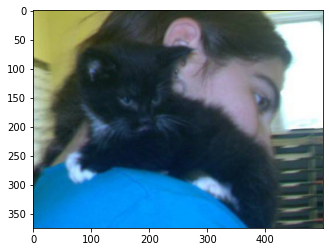

In [9]:
img_path = os.path.join(train_cats_dir, train_cat_fnames[0]) 
img = mpimg.imread(img_path)
print(img.shape)
plt.imshow(img)

In [10]:
img_width = 150
img_height = 150

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=60,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, )

validation_datagen = ImageDataGenerator(rescale=1./255.)


train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_width, img_height),
                                                    classes=['cats', 'dogs'],
                                                    batch_size=32)

validataion_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                               target_size=(img_width, img_height),
                                                               classes=['cats', 'dogs'],
                                                               batch_size=32)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
class MyModel(Model):
    def __init__(self, ):
        super(MyModel, self).__init__()
        self.layer1 = Sequential([Conv2D(32, 3, padding='same', activation='relu'), MaxPool2D(2)])
        self.layer2 = Sequential([Conv2D(64, 3, padding='same', activation='relu'), MaxPool2D(2)])
        self.layer3 = Sequential([Conv2D(128, 3, padding='same', activation='relu'), MaxPool2D(2)])
        self.flatten = Flatten()

        self.fc = Sequential([Dense(128, activation='relu'), 
                              tf.keras.layers.Dropout(0.3),
                              Dense(2, activation='softmax')])

    def call(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.flatten(x)
        output = self.fc(x)
        return output

model = MyModel()

In [48]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=5e-4)

In [49]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [50]:
history = model.fit_generator(generator=train_generator,
                    epochs=10,
                    callbacks=callbacks,
                    validation_data=validataion_generator,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
63/63 [==============================] - 18s 276ms/step - loss: 0.6814 - accuracy: 0.5600 - val_loss: 0.6657 - val_accuracy: 0.5620
Epoch 2/10
63/63 [==============================] - 17s 276ms/step - loss: 0.6634 - accuracy: 0.6035 - val_loss: 0.6449 - val_accuracy: 0.6250
Epoch 3/10
63/63 [==============================] - 18s 288ms/step - loss: 0.6453 - accuracy: 0.6470 - val_loss: 0.6251 - val_accuracy: 0.6310
Epoch 4/10
63/63 [==============================] - 17s 272ms/step - loss: 0.6374 - accuracy: 0.6535 - val_loss: 0.6026 - val_accuracy: 0.6790
Epoch 5/10
63/63 [==============================] - 17s 273ms/step - loss: 0.6093 - accuracy: 0.6715 - val_loss: 0.5988 - val_accuracy: 0.6610
Epoch 6/10
63/63 [==============================] - 17s 274ms/step - loss: 0.6062 - accuracy: 0.6730 - val_loss: 0.5746 - val_accuracy: 0.6840
Epoch 7/10
63/63 [==============================] - 17s 272ms/step - loss: 0.5980 - accuracy: 0.6835 - val_loss: 0.6371 - val_accuracy: 0.6450

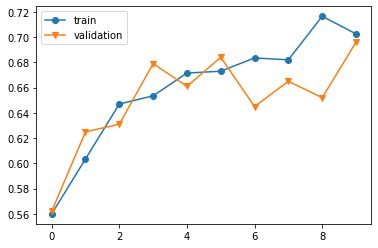

In [51]:
plt.figure()

plt.plot(history.epoch, history.history['accuracy'], marker='o', label='train')
plt.plot(history.epoch, history.history['val_accuracy'], marker='v', label='validation')
plt.legend()

plt.show();

<Figure size 720x216 with 0 Axes>

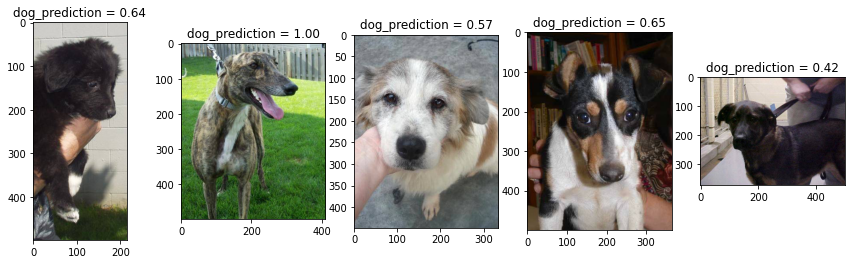

In [65]:
val_dog_fname = os.listdir(validation_dogs_dir)[:5]

plt.figure(figsize=(10, 3))


images = []
for f in val_dog_fname:
    path = os.path.join(validation_dogs_dir, f)
    img = mpimg.imread(path)
    if img is not None:
        image = cv2.resize(img, (150, 150))/255.
        images.append(image)

images = np.array(images)
predictions = model.predict(images)

plt.figure(figsize=(15, 4))
for i, v in enumerate(val_dog_fname):
    plt.subplot(1, 5, i+1)
    path = os.path.join(validation_dogs_dir, v)
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.title(f'dog_prediction = {predictions[:, 1][i]:.2f}')

plt.show();


In [59]:
a = np.array(images)
a.shape

model.predict(a)

array([[0.364495  , 0.635505  ],
       [0.00187225, 0.99812776],
       [0.43462244, 0.5653776 ],
       [0.35033438, 0.6496656 ],
       [0.58032316, 0.41967684]], dtype=float32)

In [ ]:
import cv2
folder = validation_dogs_dir

images = []
processed_images = []

for file in os.listdir(folder):
    image = mpimg.imread(os.path.join(folder, file))
    if image is not None:
        rescaled = cv2.resize(image, (150, 150))/255.0
        images.append(image)
        processed_images.append(rescaled)

processed_images = np.array(processed_images)
predictions = model.predict(processed_images)


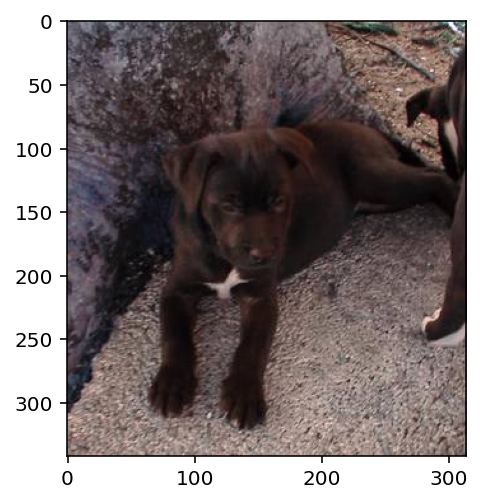

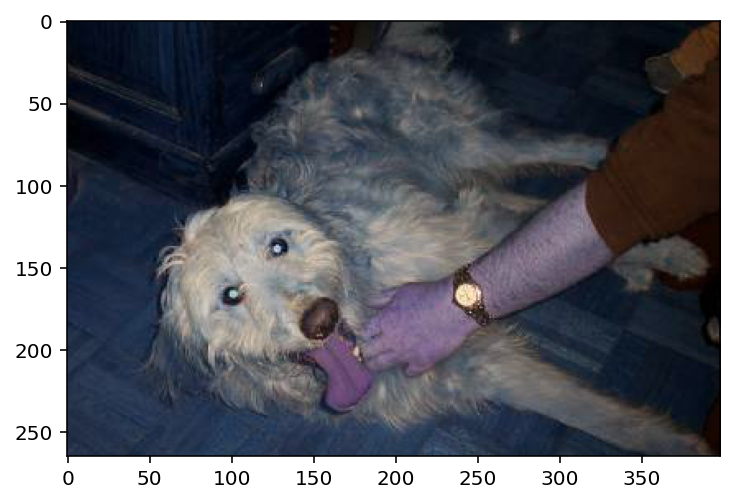

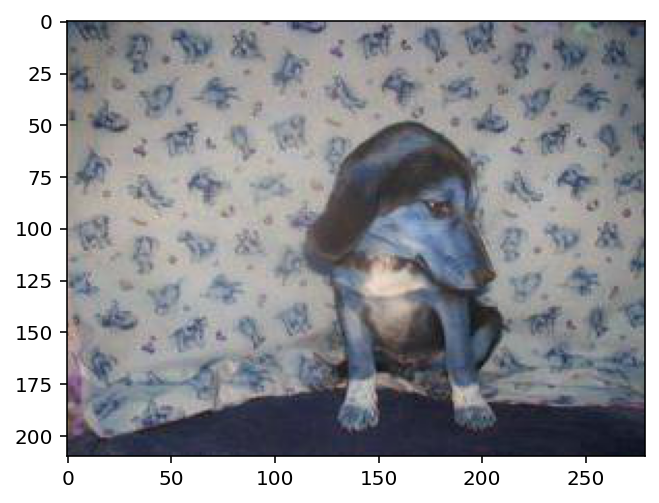

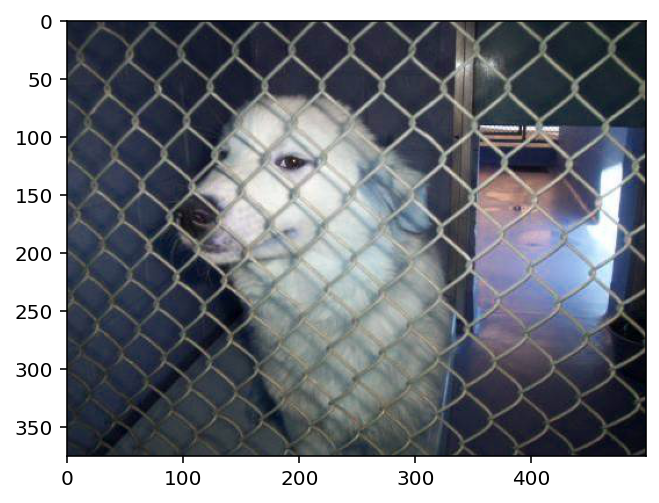

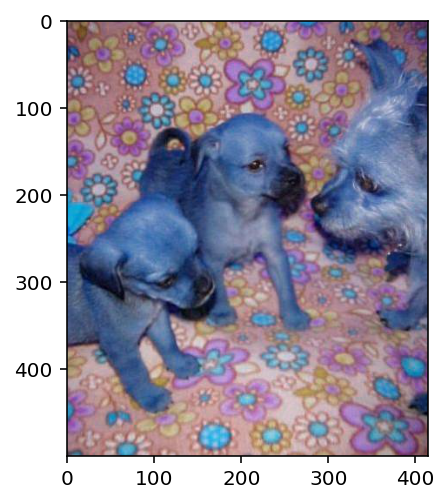

In [ ]:
for index in range(5):
     plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
     plt.show()

In [ ]:
predictions[:5][:,1]

array([0.47414696, 0.5017307 , 0.42525148, 0.37906793, 0.7680898 ],
      dtype=float32)

In [ ]:
(predictions[:5][:,1]  > 0.5).mean()

0.4